In [12]:
import pandas as pd

In [13]:
df=pd.read_csv('./weather_forecast.csv')
df.describe()

,Outlook,Temperature,Humidity,Windy,Play
count,14,14,14,14,14
unique,3,3,2,2,2
top,Sunny,Mild,High,Weak,Yes
freq,5,6,7,8,9


In [14]:
print(df.shape)
df.head()

(14, 5)


,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [15]:
X=df[['Outlook','Temperature','Humidity','Windy']]
y=df['Play']

In [16]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

# encoding part
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y) 

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X)

# traing and splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_encoded,y_encoded,test_size=.25,random_state=42)


In [17]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()

nb.fit(X_train,y_train)


GaussianNB()

In [18]:
y_pred=nb.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.75
[[1 0]
 [1 2]]


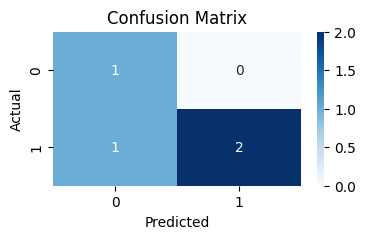

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred, labels=nb.classes_)

plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
